<a href="https://colab.research.google.com/github/gustavoep/reg_linear/blob/main/Spectral_reglinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
current_path()

Current working directory before
/content



In [4]:
dados_excel = pd.read_excel("dadosteste.xlsx")
dados_excel

,soc,355,356,357,358,359,360,361,362,363,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.79,0.0336,0.0339,0.0332,0.0308,0.0316,0.0328,0.0335,0.0330,0.0317,...,0.2566,0.2552,0.2551,0.2524,0.2519,0.2528,0.2507,0.2479,0.2458,0.2456
1,1.12,0.0388,0.0356,0.0334,0.0340,0.0358,0.0363,0.0362,0.0367,0.0350,...,0.2615,0.2611,0.2590,0.2586,0.2606,0.2598,0.2571,0.2573,0.2562,0.2528
2,1.25,0.0344,0.0316,0.0297,0.0303,0.0317,0.0317,0.0315,0.0319,0.0313,...,0.2405,0.2403,0.2388,0.2373,0.2368,0.2354,0.2352,0.2355,0.2362,0.2364
3,1.22,0.0490,0.0474,0.0463,0.0463,0.0475,0.0477,0.0479,0.0489,0.0483,...,0.2441,0.2440,0.2450,0.2440,0.2425,0.2410,0.2401,0.2396,0.2391,0.2397
4,0.90,0.0528,0.0514,0.0497,0.0493,0.0521,0.0528,0.0520,0.0514,0.0520,...,0.3156,0.3141,0.3115,0.3120,0.3138,0.3142,0.3137,0.3135,0.3126,0.3121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,9.18,0.0245,0.0285,0.0314,0.0301,0.0281,0.0285,0.0278,0.0243,0.0284,...,0.1487,0.1482,0.1530,0.1535,0.1561,0.1580,0.1557,0.1525,0.1506,0.1491
299,3.49,0.0293,0.0320,0.0338,0.0329,0.0303,0.0321,0.0331,0.0296,0.0326,...,0.1834,0.1826,0.1813,0.1809,0.1826,0.1836,0.1859,0.1862,0.1842,0.1829
300,3.59,0.0362,0.0376,0.0407,0.0432,0.0375,0.0377,0.0389,0.0355,0.0382,...,0.2033,0.2039,0.2039,0.2037,0.2054,0.2061,0.2063,0.2046,0.2010,0.1988
301,3.32,0.0353,0.0363,0.0373,0.0368,0.0329,0.0346,0.0358,0.0317,0.0337,...,0.1938,0.1930,0.1902,0.1897,0.1907,0.1934,0.1951,0.1942,0.1922,0.1905


In [23]:
x = dados_excel.soc
x

0       0.79
1       1.12
2       1.25
3       1.22
4       0.90
       ...  
298     9.18
299     3.49
300     3.59
301     3.32
302    10.83
Name: soc, Length: 303, dtype: float64

In [41]:
y= dados_excel.iloc[:,46:]
y

,400,401,402,403,404,405,406,407,408,409,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.0380,0.0382,0.0385,0.0376,0.0384,0.0391,0.0387,0.0398,0.0391,0.0382,...,0.2566,0.2552,0.2551,0.2524,0.2519,0.2528,0.2507,0.2479,0.2458,0.2456
1,0.0417,0.0416,0.0426,0.0422,0.0427,0.0431,0.0430,0.0443,0.0436,0.0427,...,0.2615,0.2611,0.2590,0.2586,0.2606,0.2598,0.2571,0.2573,0.2562,0.2528
2,0.0375,0.0376,0.0381,0.0384,0.0384,0.0387,0.0394,0.0397,0.0390,0.0384,...,0.2405,0.2403,0.2388,0.2373,0.2368,0.2354,0.2352,0.2355,0.2362,0.2364
3,0.0573,0.0577,0.0579,0.0575,0.0577,0.0581,0.0583,0.0593,0.0587,0.0578,...,0.2441,0.2440,0.2450,0.2440,0.2425,0.2410,0.2401,0.2396,0.2391,0.2397
4,0.0627,0.0631,0.0641,0.0633,0.0638,0.0647,0.0652,0.0661,0.0654,0.0648,...,0.3156,0.3141,0.3115,0.3120,0.3138,0.3142,0.3137,0.3135,0.3126,0.3121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0358,0.0356,0.0357,0.0370,0.0368,0.0359,0.0356,0.0356,0.0360,0.0364,...,0.1487,0.1482,0.1530,0.1535,0.1561,0.1580,0.1557,0.1525,0.1506,0.1491
299,0.0422,0.0422,0.0419,0.0429,0.0427,0.0421,0.0418,0.0417,0.0423,0.0430,...,0.1834,0.1826,0.1813,0.1809,0.1826,0.1836,0.1859,0.1862,0.1842,0.1829
300,0.0506,0.0503,0.0498,0.0516,0.0514,0.0506,0.0508,0.0510,0.0512,0.0514,...,0.2033,0.2039,0.2039,0.2037,0.2054,0.2061,0.2063,0.2046,0.2010,0.1988
301,0.0475,0.0478,0.0477,0.0488,0.0484,0.0476,0.0476,0.0477,0.0481,0.0485,...,0.1938,0.1930,0.1902,0.1897,0.1907,0.1934,0.1951,0.1942,0.1922,0.1905


In [26]:
x, y = np.array(x).reshape(-1,1), np.array(y)
x

array([[ 0.79],
       [ 1.12],
       [ 1.25],
       [ 1.22],
       [ 0.9 ],
       [ 1.2 ],
       [ 0.62],
       [ 1.02],
       [ 1.54],
       [ 1.45],
       [ 1.19],
       [ 1.64],
       [ 0.72],
       [ 0.32],
       [ 0.29],
       [ 0.76],
       [ 0.7 ],
       [ 1.97],
       [ 0.5 ],
       [ 0.49],
       [ 0.79],
       [ 1.02],
       [ 0.55],
       [ 1.85],
       [ 0.73],
       [ 1.74],
       [ 0.8 ],
       [ 1.03],
       [ 0.58],
       [ 0.47],
       [ 0.88],
       [ 0.77],
       [ 0.64],
       [ 1.51],
       [ 1.95],
       [ 1.56],
       [ 1.28],
       [ 1.92],
       [ 1.51],
       [ 0.43],
       [ 1.43],
       [ 0.9 ],
       [ 1.19],
       [ 0.94],
       [ 1.72],
       [ 0.89],
       [ 1.01],
       [ 1.18],
       [ 0.77],
       [ 0.53],
       [ 0.67],
       [ 0.59],
       [ 1.24],
       [ 1.47],
       [ 1.23],
       [ 1.22],
       [ 2.64],
       [ 0.54],
       [ 1.2 ],
       [ 1.39],
       [ 1.21],
       [ 2.04],
       [

In [56]:
z = dados_excel.columns[1:2147]
z

Index([ 355,  356,  357,  358,  359,  360,  361,  362,  363,  364,
       ...
       2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500],
      dtype='object', length=2146)

In [54]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.16289126434830778


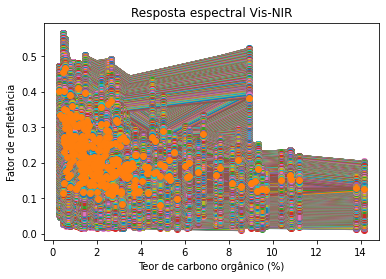

In [38]:
plt.title("Resposta espectral Vis-NIR")
plt.xlabel("Teor de carbono orgânico (%)")
plt.ylabel("Fator de refletância")
plt.plot(x, y)
plt.plot(x, y, 'o')
plt.show()